<a href="https://colab.research.google.com/github/OleksiiLatypov/DRU_Data_Science_Fundamentals/blob/main/Kaggle/US_Gasoline_and_Diesel_Priecs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

- A1 = Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars
per Gallon)
- A2 = Weekly U.S. All Grades Conventional Retail Gasoline Prices (Dollars per Gallon)
- A3 = Weekly U.S. All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon)
- R1 = Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
- R2 = Weekly U.S. Regular Conventional Retail Gasoline Prices (Dollars per Gallon)
- R3 = Weekly U.S. Regular Reformulated Retail Gasoline Prices (Dollars per Gallon)
- M1 = Weekly U.S. Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon)
- M2 = Weekly U.S. Midgrade Conventional Retail Gasoline Prices (Dollars per Gallon)
- M3 = Weekly U.S. Midgrade Reformulated Retail Gasoline Prices (Dollars per Gallon)
- P1 = Weekly U.S. Premium All Formulations Retail Gasoline Prices (Dollars per Gallon)
- P2 = Weekly U.S. Premium Conventional Retail Gasoline Prices (Dollars per Gallon)
- P3 = Weekly U.S. Premium Reformulated Retail Gasoline Prices (Dollars per Gallon)
- D1 = Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon)





In [5]:
path = '/content/PET_PRI_GND_DCUS_NUS_W.csv'
df = pd.read_csv(path, delimiter=',')
df.shape

(1361, 14)

In [6]:
df.head(5)

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      1361 non-null   float64
 1   A2      1361 non-null   float64
 2   A3      1361 non-null   float64
 3   R1      1361 non-null   float64
 4   R2      1361 non-null   float64
 5   R3      1361 non-null   float64
 6   M1      1361 non-null   float64
 7   M2      1361 non-null   float64
 8   M3      1361 non-null   float64
 9   P1      1361 non-null   float64
 10  P2      1361 non-null   float64
 11  P3      1361 non-null   float64
 12  D1      1361 non-null   float64
 13  Day     1361 non-null   int64  
 14  Month   1361 non-null   int64  
 15  Year    1361 non-null   int64  
dtypes: float64(13), int64(3)
memory usage: 170.2 KB


In [33]:
df.describe()

,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,Day,Month,Year
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000
mean,2.285680,2.234511,2.396873,2.225170,2.178511,2.329126,2.382822,2.320970,2.508877,2.519840,2.472096,2.609244,2.404699,15.720059,6.509184,2007.537105
std,0.859028,0.843815,0.883311,0.850143,0.835549,0.876739,0.882107,0.858521,0.908861,0.911055,0.894472,0.925587,0.998646,8.802003,3.458805,7.528494
min,0.949000,0.926000,1.039000,0.907000,0.885000,0.974000,1.008000,0.979000,1.112000,1.100000,1.074000,1.191000,0.953000,1.000000,1.000000,1995.000000
25%,1.461000,1.433000,1.550000,1.421000,1.393000,1.489000,1.517000,1.482000,1.616000,1.607000,1.573000,1.695000,1.418000,8.000000,4.000000,2001.000000
50%,2.326000,2.251000,2.458000,2.237000,2.175000,2.367000,2.481000,2.404000,2.627000,2.693000,2.640000,2.769000,2.479000,16.000000,7.000000,2008.000000
75%,2.903000,2.825000,3.060000,2.828000,2.765000,2.976000,3.033000,2.930000,3.206000,3.209000,3.127000,3.318000,3.070000,23.000000,10.000000,2014.000000
max,4.165000,4.102000,4.301000,4.114000,4.054000,4.247000,4.229000,4.153000,4.387000,4.344000,4.283000,4.459000,4.764000,31.000000,12.000000,2021.000000


In [7]:
# Extracting month from date column.
df.Date = df.Date.apply(pd.to_datetime)
df['Day'] = df['Date'].apply(lambda x:x.day)
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Year'] = df['Date'].apply(lambda x:x.year)
df.drop('Date',axis=1,inplace=True)

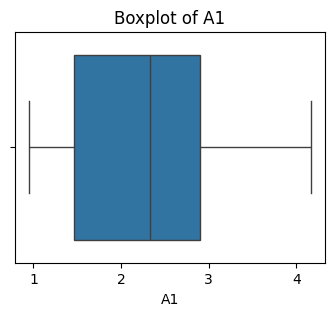

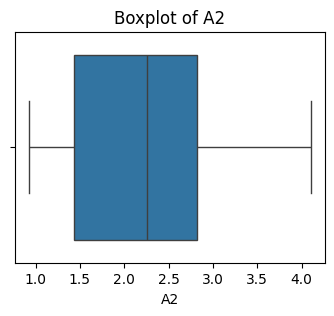

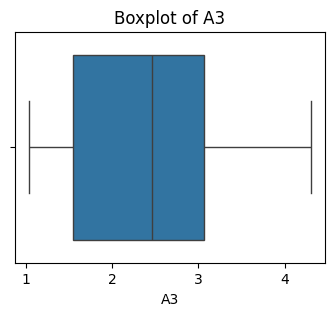

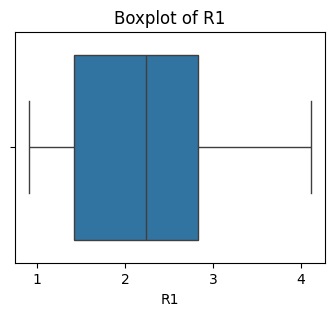

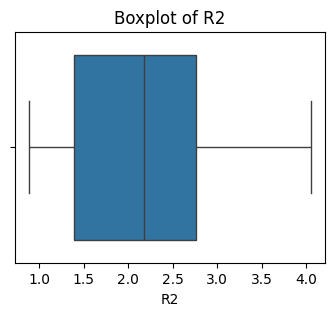

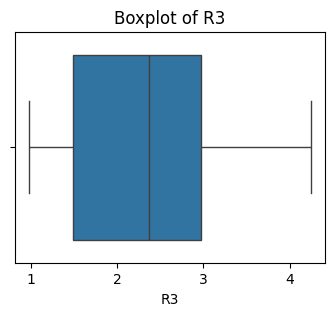

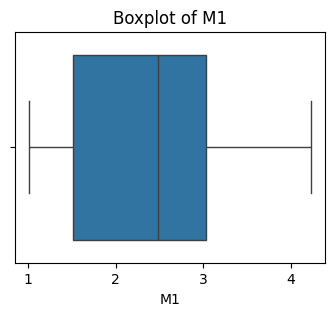

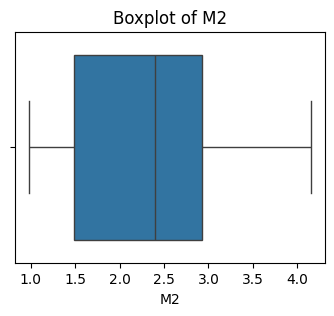

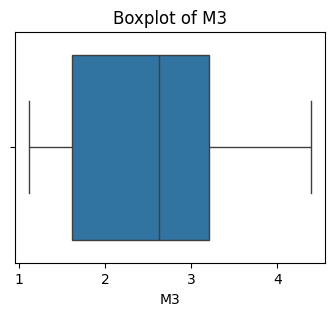

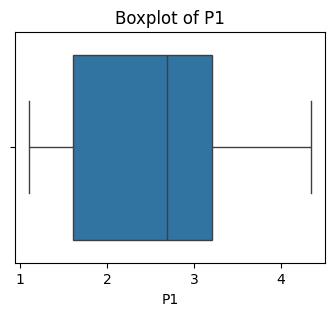

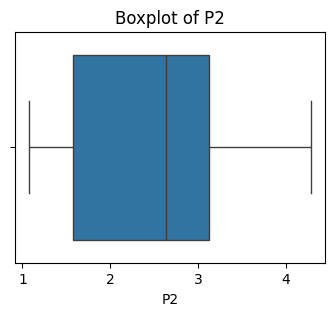

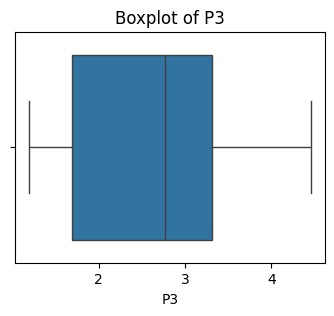

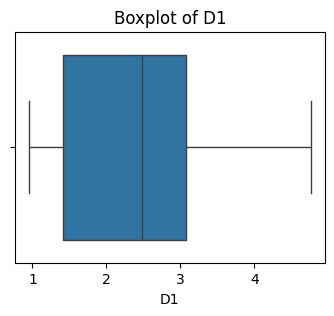

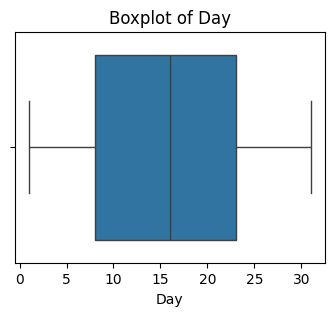

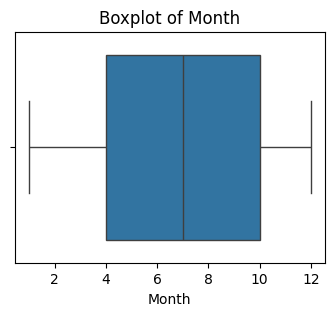

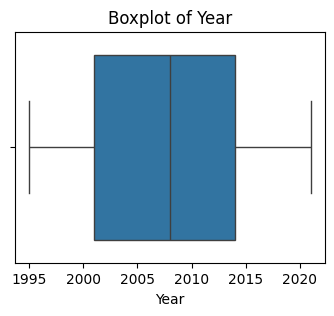

In [41]:
for column in df.columns:
  plt.figure(figsize=(4, 3))
  plt.title(f'Boxplot of {column}')
  sns.boxplot(df[column], orient='h')
  plt.show()

In [18]:
df_year = df.groupby(['Year'])['A1', 'A2',	'A3',	'R1',	'R2', 'R3', 'M1',	'M2',	'M3',	'P1',	'P2',	'P3',	'D1'].sum()
df_year

<ipython-input-18-dd5b1a47ac19>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_year = df.groupby(['Year'])['A1', 'A2',	'A3',	'R1',	'R2', 'R3', 'M1',	'M2',	'M3',	'P1',	'P2',	'P3',	'D1'].sum()


,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
Year,,,,,,,,,,,,,
1995,60.201,59.464,63.420,57.765,57.372,60.450,62.433,62.192,66.815,67.495,66.932,71.180,57.676
1996,65.960,65.234,68.733,63.551,63.172,65.815,68.114,67.848,72.290,73.174,72.646,76.217,65.470
1997,64.701,63.845,67.954,62.350,61.812,65.121,66.778,66.389,71.618,71.763,71.161,75.243,62.312
1998,55.729,54.923,58.923,53.542,52.866,56.045,58.339,57.506,62.455,63.121,62.337,66.336,54.282
1999,61.155,60.087,65.528,59.062,58.031,62.148,64.147,62.765,69.218,68.621,67.421,72.784,58.267
2000,79.182,78.036,83.467,77.158,76.040,80.229,81.976,80.535,86.856,86.473,85.248,90.545,77.520
2001,77.396,75.367,82.089,75.263,73.343,79.416,80.204,77.793,85.607,84.931,82.754,89.656,74.227
2002,72.070,70.315,75.550,69.914,68.259,73.238,74.850,72.759,78.866,79.568,77.778,82.887,68.575
2003,83.357,80.838,88.433,81.177,78.822,86.045,86.228,83.232,92.017,90.886,88.263,95.781,78.485


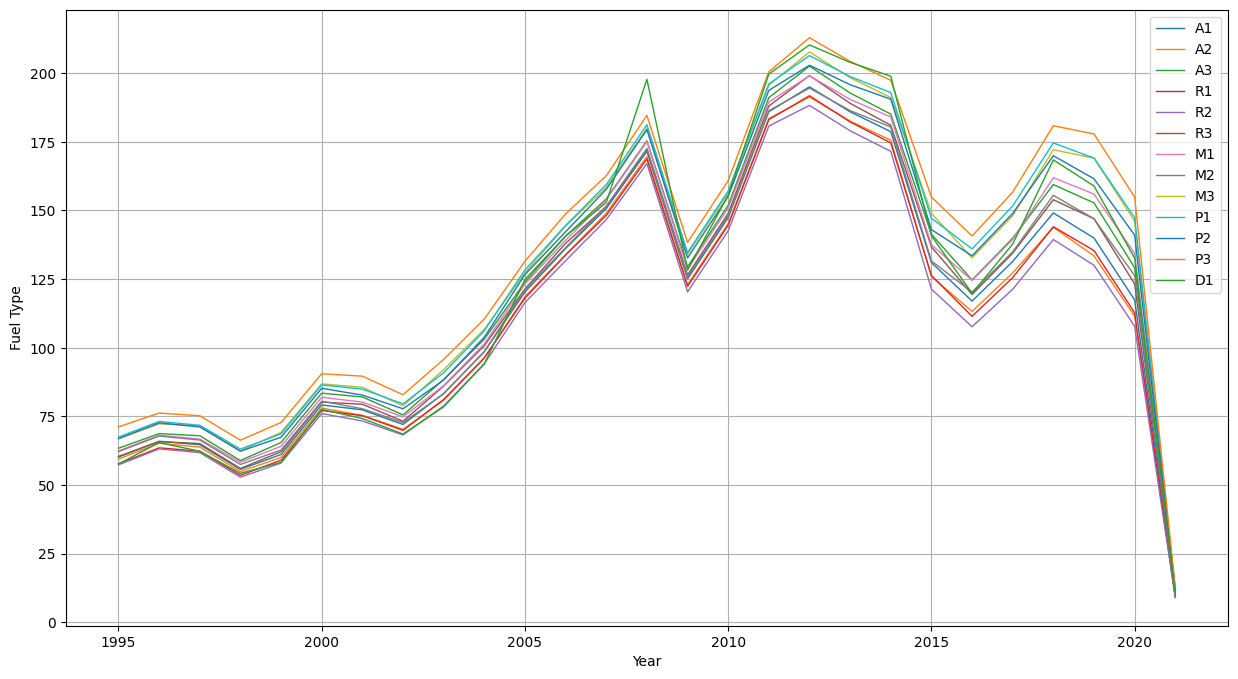

In [31]:
plt.figure(figsize=(15, 8))
for fuel_type in df_year.columns:
  plt.plot(df_year.index, df_year[fuel_type], label=fuel_type, linewidth=1)

plt.xlabel('Year')
plt.ylabel('Fuel Type')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
df.drop(['Year', 'Day', 'Month'], axis=1, inplace=True)

In [64]:
df.head()

,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


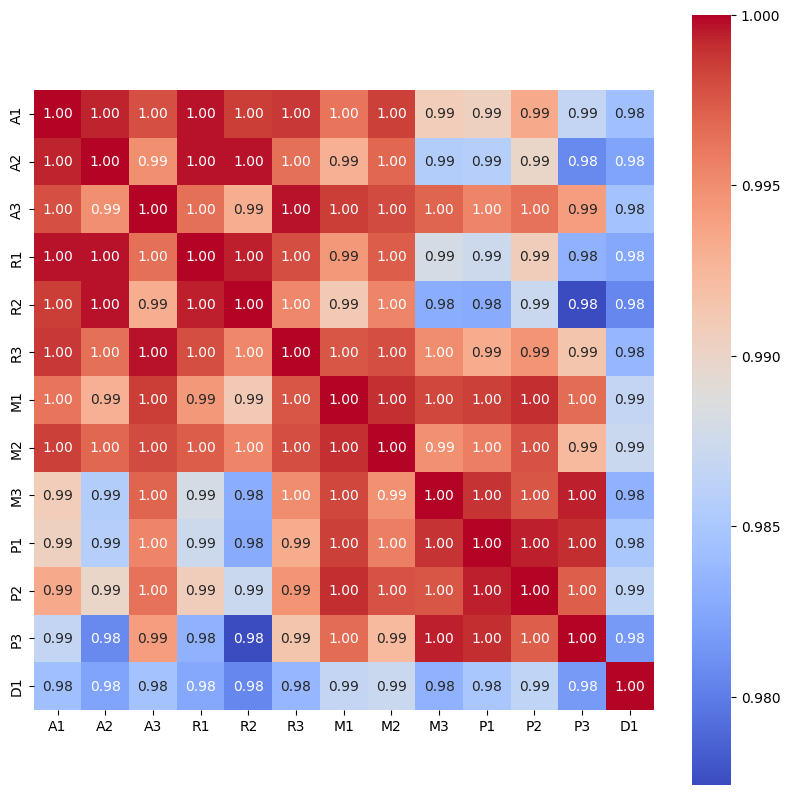

In [66]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.show()

In [67]:
X, y = df.drop('D1', axis=1), df['D1']

In [69]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)

In [146]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau


model = Sequential()

model.add(Dense(10, activation='relu', kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                kernel_regularizer=regularizers.l2(0.001)))  # L2 regularization with a regularization parameter of 0.01
model.add(Dense(500, activation='relu', kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                kernel_regularizer=regularizers.l2(0.001)))  # L2 regularization with a regularization parameter of 0.01

model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_absolute_error')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, verbose=1, min_delta=0.001)

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)


In [153]:
history = model.fit(x=X_train.values,y=y_train.values,
          validation_data=(X_val.values,y_val.values),
          batch_size=100,epochs=500,callbacks=[early_stop, reduce_lr])

model.save('mymodel.h5')

Epoch 1/500
9/9 [==============================] - 0s 15ms/step - loss: 0.1383 - val_loss: 0.1130 - lr: 9.7656e-07
Epoch 2/500
9/9 [==============================] - 0s 10ms/step - loss: 0.1372 - val_loss: 0.1130 - lr: 9.7656e-07
Epoch 3/500
9/9 [==============================] - 0s 9ms/step - loss: 0.1381 - val_loss: 0.1130 - lr: 9.7656e-07
Epoch 4/500
9/9 [==============================] - 0s 9ms/step - loss: 0.1377 - val_loss: 0.1129 - lr: 9.7656e-07
Epoch 5/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1382 - val_loss: 0.1129 - lr: 9.7656e-07
Epoch 6/500
9/9 [==============================] - 0s 9ms/step - loss: 0.1420 - val_loss: 0.1129 - lr: 9.7656e-07
Epoch 7/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1382 - val_loss: 0.1130 - lr: 9.7656e-07
Epoch 8/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1392 - val_loss: 0.1130 - lr: 9.7656e-07
Epoch 9/500
9/9 [==============================] - 0s 10ms/step - loss: 0.1386 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tensorflow.python.ops.init_ops_v2.RandomUniform'>, which may lead to improper serialization.
  warnings.warn(


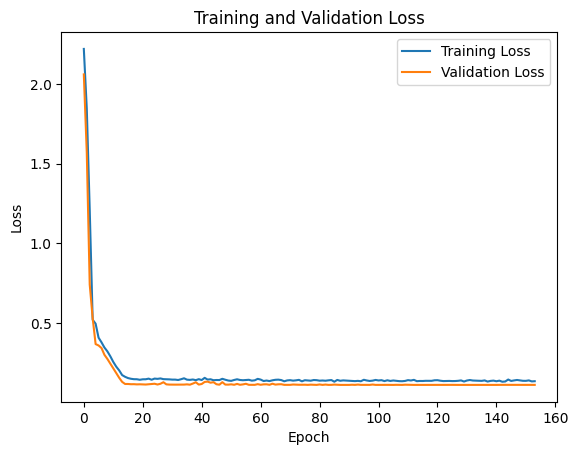

In [148]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [149]:
predictions = model.predict(X_test.values)

9/9 [==============================] - 0s 2ms/step


In [150]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming y_test is the true labels for the test data and predictions are the model's predictions
r2 = r2_score(y_test.values, predictions)
mse = mean_squared_error(y_test.values, predictions)


print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mse)

R2 Score: 0.9788436917477743
Mean Squared Error: 0.022659972240317214
Mean Absolute Error: 0.022659972240317214
